# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create two new dataframes

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

print(north_df.to_string())
print(south_df.to_string())


     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
0             0  North        Complaint    9:00 AM             Incoming     B   Brent    NO          0          1             9                  2                 1.0                      4      1
1             1  North    Sales Support   11:00 AM             Incoming     A     Cam    NO          0          0            11                  1                 1.0                      3      1
2             2  North    Sales Support   11:00 AM             Incoming     B    Todd    NO          0          0             9                  3                 1.0                      3      1
3             3  North    Sales Support    4:00 PM             Incoming     B   Brent    NO          0          0            11                  2                 1.0                      4      1
4             4

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
# EDA Question 1A solution below:
print(north_df.value_counts("Rep ID"))

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: count, dtype: int64


#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
# EDA Question 1B solution Below:
print(south_df.value_counts('Rep ID'))

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: count, dtype: int64


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
# EDA Question 2A solution Below:
print(round(north_df.describe(),2))

       Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
count      245.00     245.00     245.00        245.00             245.00   
mean       122.00       0.02       0.03          9.99               1.91   
std         70.87       0.14       0.17          1.40               0.77   
min          0.00       0.00       0.00          8.00               1.00   
25%         61.00       0.00       0.00          9.00               1.00   
50%        122.00       0.00       0.00         10.00               2.00   
75%        183.00       0.00       0.00         11.00               3.00   
max        244.00       1.00       1.00         12.00               3.00   

       Incoming Wait Time  During Call Wait Time  Calls  
count               82.00                 245.00  245.0  
mean                 3.05                   2.97    1.0  
std                  1.46                   0.84    0.0  
min                  1.00                   2.00    1.0  
25%                  2.00

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
# EDA Question 2B solution Below:
print(round(south_df.describe(),2))

       Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
count      314.00     314.00     314.00        314.00             314.00   
mean       156.50       0.04       0.01         10.05               1.91   
std         90.79       0.18       0.11          1.41               0.86   
min          0.00       0.00       0.00          8.00               1.00   
25%         78.25       0.00       0.00          9.00               1.00   
50%        156.50       0.00       0.00         10.00               2.00   
75%        234.75       0.00       0.00         11.00               3.00   
max        313.00       1.00       1.00         12.00               3.00   

       Incoming Wait Time  During Call Wait Time  Calls  
count              126.00                 314.00  314.0  
mean                 3.00                   3.08    1.0  
std                  1.31                   0.82    0.0  
min                  1.00                   2.00    1.0  
25%                  2.00

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# EDA Question 3 solution Below:
df = pd.concat([north_df, south_df], axis=0)
print(df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
309         309  South  Product Support    5:00 PM             Outgoing     D   
310         310  South  Product Support    5:00 PM             Outgoing     C   
311         311  South  Product Support    5:00 PM             Outgoing     C   
312         312  South  Product Support    5:00 PM             Outgoing     C   
313         313  South  Product Support    5:00 PM             Outgoing     D   

     Rep ID Sale  Lost Call

In [10]:
print(df.value_counts('Time Block'))

Time Block
12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: count, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [11]:
# Question 1 solution below
print(north_df.info())
print(south_df.info()) # Column Incoming Wait Time has the most null entries in both datasets.#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [12]:
print(north_df.isnull().sum().to_string())
print(south_df.isnull().sum().to_string())

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0


In [13]:
print(north_df.interpolate(method="pad").to_string())

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
0             0  North        Complaint    9:00 AM             Incoming     B   Brent    NO          0          1             9                  2                 1.0                      4      1
1             1  North    Sales Support   11:00 AM             Incoming     A     Cam    NO          0          0            11                  1                 1.0                      3      1
2             2  North    Sales Support   11:00 AM             Incoming     B    Todd    NO          0          0             9                  3                 1.0                      3      1
3             3  North    Sales Support    4:00 PM             Incoming     B   Brent    NO          0          0            11                  2                 1.0                      4      1
4             4

/var/folders/k9/zsr43mf97z750z0s8cw9m8s00000gn/T/ipykernel_64985/447649951.py:1: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(north_df.interpolate(method="pad").to_string())


In [64]:
print(south_df.interpolate(method="pad").to_string())

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
0             0  South    Sales Support   10:00 AM             Incoming     D    Kate   NO          0          0             9                  1                 1.0                      2      1
1             1  South    Sales Support   10:00 AM             Incoming     C    Eric   NO          0          0             8                  2                 1.0                      4      1
2             2  South    Sales Support   10:00 AM             Incoming     C   Susan   NO          0          0            10                  2                 1.0                      4      1
3             3  South    Sales Support   10:00 AM             Incoming     C   Alice   NO          0          0            12                  1                 1.0                      3      1
4             4  Sou

/var/folders/k9/zsr43mf97z750z0s8cw9m8s00000gn/T/ipykernel_83090/1960192176.py:1: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(south_df.interpolate(method="pad").to_string())


#### Record your answer below:

> Your Answer: # Yes there was missing data in both datasets. Column "Incoming Wait Time" was ht eonly one wand it was missing over 50% of entries for both datasets. I considered the column very valuable to the summarization of data and didn't want to delete that crucial percentage of data. Also, considering that the value entered is a part of a division of two other columns. The rows that did have values looked accurate and easy to fill in so I went with filling in the missing data based on current values trends entered.#

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [67]:
# Cleaning Question 2 solution below:
print(north_df.to_string())

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
0             0  North        Complaint    9:00 AM             Incoming     B   Brent    NO          0          1             9                  2                 1.0                      4      1
1             1  North    Sales Support   11:00 AM             Incoming     A     Cam    NO          0          0            11                  1                 1.0                      3      1
2             2  North    Sales Support   11:00 AM             Incoming     B    Todd    NO          0          0             9                  3                 1.0                      3      1
3             3  North    Sales Support    4:00 PM             Incoming     B   Brent    NO          0          0            11                  2                 1.0                      4      1
4             4

##### Record your answer by below:
> Your Answer: I rectified the issue by leaving both "YES" value entries for the two different sales. Reason being after looking into rows 86 & 87, Lilly's busy minutes have two different time count. Concluding to me that these where two different call entries and not a duplicate. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [72]:
# Cleaning Question 3 solution below:
print(north_df.duplicated().to_string())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [73]:
print(south_df.duplicated().to_string())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

##### Record your answer below:
> Your Answer: There are not any duplicates in the two data sets.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [17]:
# Cleaning Question 4 solution below: 

##### Record your answer below:
> Your Answer: I do not see any of the data in the two data sets being unnecessary.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [78]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], axis=0)


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [14]:
# Manipulation Question solution below:
north_group = north_df.groupby(['Rep ID']).sum()
print(north_group.sort_values(by='Calls'))

        Unnamed: 0                                             Branch  \
Rep ID                                                                  
Amanda        2666  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Andy          2494  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Cam           2746  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Xander        3340  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Joe           3178  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Duke          2999  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Todd          4252  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Lilly         3375  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Brent         4840  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   

                                             Call Purpose  \
Rep ID                                                      
Amanda  Product SupportProduct SupportProduct SupportS...   
Andy    Compl

In [15]:
south_group = south_df.groupby(['Rep ID']).sum()
print(south_group.sort_values(by='Calls'))

        Unnamed: 0                                             Branch  \
Rep ID                                                                  
Alice         3637  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Sharon        4226  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Josh          3960  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Susan         4006  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Karl          4532  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
George        4620  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Kate          4615  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Helga         5236  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Sandy         4694  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Randy         4576  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Eric          5039  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   

                                             Call 

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37 calls
- South Branch = Eric 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [16]:
north_numeric = north_df.select_dtypes(include='number')
print(round(north_numeric.mean(),4)*100)

Unnamed: 0               12200.00
Lost Call                    2.04
Abandoned                    2.86
Busy Minutes               998.78
Not Ready Minutes          191.43
Incoming Wait Time         304.88
During Call Wait Time      296.73
Calls                      100.00
dtype: float64


In [17]:
south_numeric = south_df.select_dtypes(include='number')
print(round(south_numeric.mean(),4)*100)

Unnamed: 0               15650.00
Lost Call                    3.50
Abandoned                    1.27
Busy Minutes              1005.41
Not Ready Minutes          191.08
Incoming Wait Time         300.00
During Call Wait Time      307.64
Calls                      100.00
dtype: float64


In [18]:
# Manipulation Question 2 solution below:
numeric_df = df.select_dtypes(include='number')
print(round(numeric_df.mean(),4)*100)

Unnamed: 0               14137.92
Lost Call                    2.86
Abandoned                    1.97
Busy Minutes              1002.50
Not Ready Minutes          191.23
Incoming Wait Time         301.92
During Call Wait Time      302.86
Calls                      100.00
dtype: float64


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27 
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? Yes

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [19]:
# Manipulation Question 3 solution below:
# Find North branch total incoming calls

#Import Pandas
import pandas as pd

#Define and read csv
north_df = pd.read_csv('NorthCallCenter.csv')

#Filter 
north_incoming = north_df[north_df['Incoming or Outgoing'] == "Incoming"]
print(north_incoming.shape[0])


#Find North branch total Incoming Wait Time less than 2 seconds

#Filter
north_incoming_wait = north_df[north_df['Incoming Wait Time'] <= 2]
print(north_incoming_wait.shape[0])

#Find percentage
north_percentage = north_incoming_wait.shape[0]/ north_incoming.shape[0]* 100
print(north_percentage)








82
33
40.243902439024396


In [20]:
#Import Pandas
import pandas as pd

#Define and read csv
south_df = pd.read_csv('SouthCallCenter.csv')

#Filter 
south_incoming = south_df[south_df['Incoming or Outgoing'] == "Incoming"]
print(south_incoming.shape[0])


#Find North branch total Incoming Wait Time less than 2 seconds

#Filter
south_incoming_wait = south_df[south_df['Incoming Wait Time'] <= 2]
print(south_incoming_wait.shape[0])

#Find percentage
south_percentage = south_incoming_wait.shape[0]/ south_incoming.shape[0]* 100
print(south_percentage)

126
48
38.095238095238095


In [21]:
#Import Pandas
import pandas as pd

#Define and read csv
df = pd.concat([north_df, south_df], axis=0)

#Filter 
df_incoming = df[df['Incoming or Outgoing'] == "Incoming"]
print(df_incoming.shape[0])


#Find North branch total Incoming Wait Time less than 2 seconds

#Filter
df_incoming_wait = df[df['Incoming Wait Time'] <= 2]
print(df_incoming_wait.shape[0])

#Find percentage
df_percentage = df_incoming_wait.shape[0]/ df_incoming.shape[0]* 100
print(df_percentage)

208
81
38.94230769230769


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.10% and 48 calls
- Company Wide = 38.94% and 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [22]:
# Manipulation Question 4 solution below:
north_df = pd.read_csv('NorthCallCenter.csv')
north_mean = north_df.select_dtypes(include= 'number')
print(round(north_mean.mean(),2)*1.00)


Unnamed: 0               122.00
Lost Call                  0.02
Abandoned                  0.03
Busy Minutes               9.99
Not Ready Minutes          1.91
Incoming Wait Time         3.05
During Call Wait Time      2.97
Calls                      1.00
dtype: float64


In [23]:
south_df = pd.read_csv('SouthCallCenter.csv')
south_mean = south_df.select_dtypes(include= 'number')
print(round(south_mean.mean(),2)*1.00)

Unnamed: 0               156.50
Lost Call                  0.04
Abandoned                  0.01
Busy Minutes              10.05
Not Ready Minutes          1.91
Incoming Wait Time         3.00
During Call Wait Time      3.08
Calls                      1.00
dtype: float64


In [24]:
df = pd.concat([north_df, south_df], axis=0)
df_mean = df.select_dtypes(include= 'number')
print(round(df_mean.mean(),2)*1.00)

Unnamed: 0               141.38
Lost Call                  0.03
Abandoned                  0.02
Busy Minutes              10.03
Not Ready Minutes          1.91
Incoming Wait Time         3.02
During Call Wait Time      3.03
Calls                      1.00
dtype: float64


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

{'A': np.float64(0.041666666666666664), 'B': np.float64(0.020134228187919462), 'C': np.float64(0.007246376811594203), 'D': np.float64(0.017045454545454544)}


/var/folders/k9/zsr43mf97z750z0s8cw9m8s00000gn/T/ipykernel_64985/2545519378.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


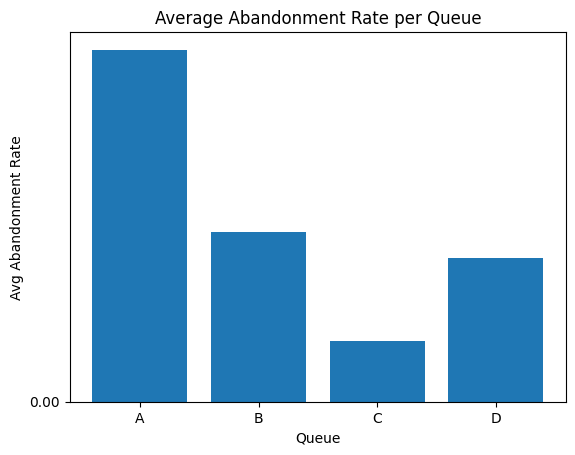

In [64]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import MultipleLocator

df = pd.concat([north_df, south_df], axis=0)

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
print(abandonment_rates)

#Your code below:

plt.bar(abandonment_rates.keys(), abandonment_rates.values())
plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Avg Abandonment Rate')

#Setting y-axis for better distinction
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


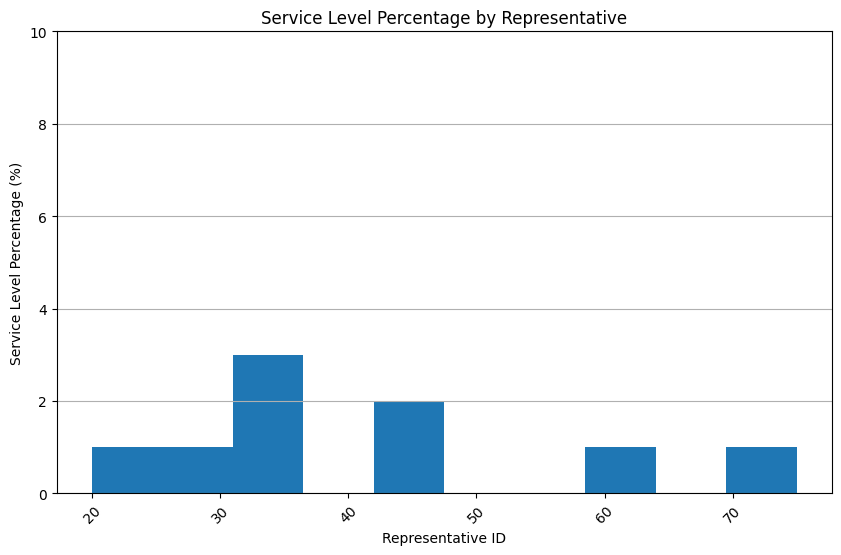

In [86]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
print(north_plt)
# Finding each Rep's Personal Service Level Percentange.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(service_level)
#Your Code Here:

plt.figure(figsize=(10, 6))
plt.hist(service_level["Service Level %"])
plt.xlabel('Representative ID')
plt.ylabel('Service Level Percentage (%)')
plt.title('Service Level Percentage by Representative')
plt.xticks(rotation=45)
plt.ylim(0, 10)  # Set y-axis limits from 0 to 100%
plt.grid(axis='y')

Text(0, 0.5, 'Service Level %')

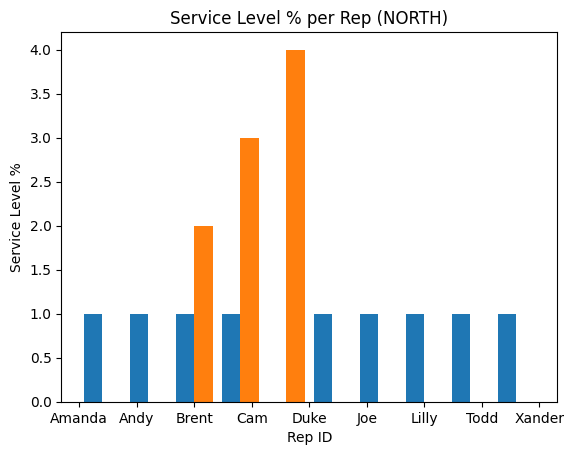

In [84]:
plt.hist(north_plt, bins=10)
plt.title('Service Level % per Rep (NORTH)')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')

##### Record your answer below:

> Chart style you chose and why: I chose chart style scatterplot. The reason is I wanted to see if their was a relationship between the average speed the rep answered the phone and their avg ervice level percentage.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


<BarContainer object of 1 artists>

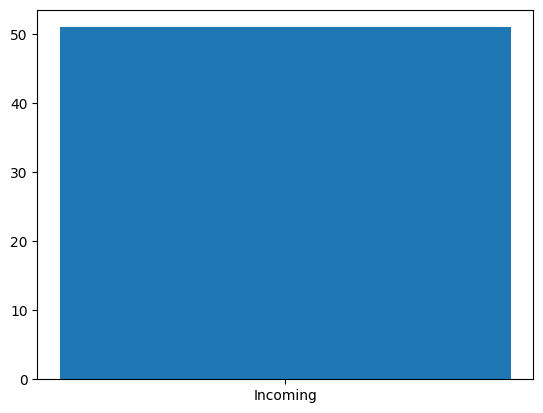

In [60]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
df = pd.concat([north_df, south_df], axis=0) 

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
plt.bar(complaints.keys(), complaints.values())

<Figure size 200x400 with 0 Axes>

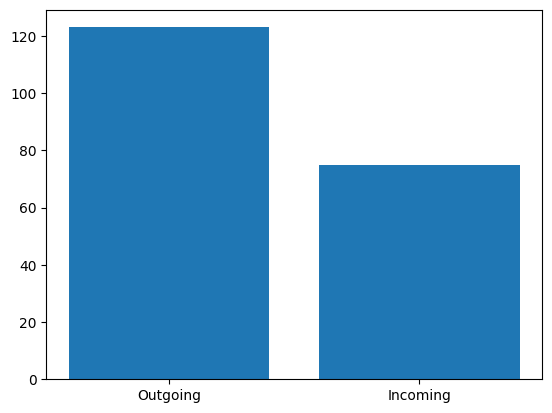

<Figure size 200x400 with 0 Axes>

In [59]:
plt.bar(sales_support.keys(), sales_support.values())
plt.figure(figsize=(2,4))

<BarContainer object of 2 artists>

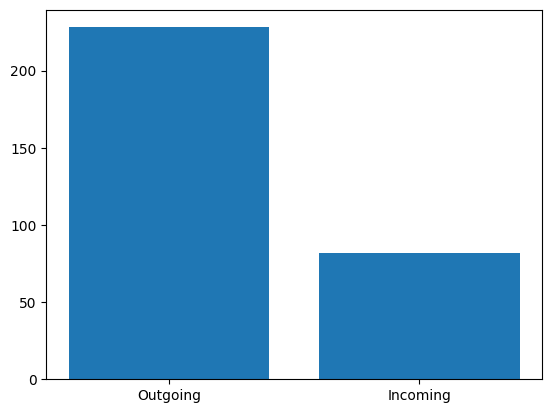

In [72]:
plt.bar(product_support.keys(), product_support.values())

##### Record your answer below:

> Chart style you chose and why: I chose the chart style bar chart. The reason I chose it is because I wanted to compare the total of incoming and outgoing calls for each purpose and infer on why the results are how they are.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: South branch is operating more efficiently to me. The branch gets the most incoming calls (126) and is able to maintain a low abandonment rate of 1.27, a high service percentage rate close to the company average and fastest speed of answer (3.00).



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: In my opinion the North branch would benefit the most from the extra help. The South branch have higher numbers most likely to the number of Reps they have. North receive the fewest total  umber of calls and yet is the lowest average speed of answer and high abandonment rate.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: No, i feel like the data provided had majority of everything needed to answer the business issue.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined